In [146]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime

In [163]:
ticker = '0200.kl'
KL0200 = yf.Ticker(ticker)
# Last 3 years closing prices starting from Jan 2, 2018.
 
now = dt.datetime.now()
startyear = 2018
startmonth = 1 
startday = 2
start = dt.datetime(startyear, startmonth, startday)
interval_ = '1d'
df = yf.download(ticker, start, now, interval = interval_)
#df = pdr.get_data_yahoo(ticker, start, now)
KL0200.info

[*********************100%***********************]  1 of 1 completed


{'exchange': 'KLS',
 'shortName': 'REVENUE',
 'exchangeTimezoneName': 'Asia/Kuala_Lumpur',
 'exchangeTimezoneShortName': 'MYT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '28800000',
 'quoteType': 'EQUITY',
 'symbol': '0200.KL',
 'market': 'my_market',
 'previousClose': 1.8,
 'regularMarketOpen': 1.81,
 'twoHundredDayAverage': 1.9325352,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 1.81,
 'navPrice': None,
 'averageDailyVolume10Day': 535016,
 'totalAssets': None,
 'regularMarketPreviousClose': 1.8,
 'fiftyDayAverage': 1.8448571,
 'trailingAnnualDividendRate': None,
 'open': 1.81,
 'toCurrency': None,
 'averageVolume10days': 535016,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 1.79,
 'priceHint': 4,
 'currency': 'MYR',
 'regularMarketVolume': 348700,
 'lastMarket': None,
 '

In [148]:
## 14_Day RSI
df['Up Move'] = np.nan
df['Down Move'] = np.nan
df['Average Up'] = np.nan
df['Average Down'] = np.nan
# Relative Strength
df['RS'] = np.nan
# Relative Strength Index
df['RSI'] = np.nan

    

# Relative Strength Index (RSI):
## When the RSI surpasses the horizontal 30 reference level, it is a bullish sign and when it slides below the horizontal 70 reference level, it is a bearish sign.

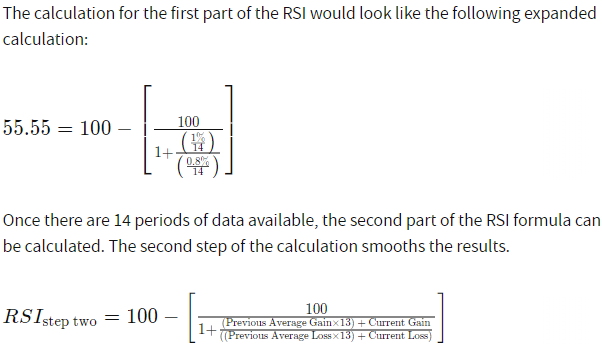

In [149]:
## Calculate Up Move & Down Move
for x in range(1, len(df)):
    df['Up Move'][x] = 0
    df['Down Move'][x] = 0
    
    if df['Adj Close'][x] > df['Adj Close'][x-1]:
        df['Up Move'][x] = df['Adj Close'][x] - df['Adj Close'][x-1]
        
    if df['Adj Close'][x] < df['Adj Close'][x-1]:
        df['Down Move'][x] = abs(df['Adj Close'][x] - df['Adj Close'][x-1])  
        


<ipython-input-149-f70e9d81cf34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up Move'][x] = 0
<ipython-input-149-f70e9d81cf34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Down Move'][x] = 0
<ipython-input-149-f70e9d81cf34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up Move'][x] = df['Adj Close'][x] - df['Adj Close'][x-1]
<ipython-input-149-f70e9d81cf34>:10: SettingWithCopyWarning: 
A value is trying to be se

In [150]:
## RSI average day 
Average_day = 20
## Calculate initial Average Up & Down, RS and RSI
df['Average Up'][Average_day] = df['Up Move'][1:Average_day+1].mean()
df['Average Down'][Average_day] = df['Down Move'][1:Average_day+1].mean()
df['RS'][Average_day] = df['Average Up'][Average_day] / df['Average Down'][Average_day]
df['RSI'][Average_day] = 100 - (100/(1+df['RS'][Average_day]))


<ipython-input-150-bd22e1cb2701>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Up'][Average_day] = df['Up Move'][1:Average_day+1].mean()
<ipython-input-150-bd22e1cb2701>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Down'][Average_day] = df['Down Move'][1:Average_day+1].mean()
<ipython-input-150-bd22e1cb2701>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'][Average_day] = df['Average Up'][Average_

In [151]:
## Calculate rest of Average Up, Average Down, RS, RSI
for x in range(Average_day+1, len(df)):
    df['Average Up'][x] = (df['Average Up'][x-1]*(Average_day-1)+df['Up Move'][x])/Average_day
    df['Average Down'][x] = (df['Average Down'][x-1]*(Average_day-1)+df['Down Move'][x])/Average_day
    df['RS'][x] = df['Average Up'][x] / df['Average Down'][x]
    df['RSI'][x] = 100 - (100/(1+df['RS'][x]))

<ipython-input-151-8b631087b353>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Up'][x] = (df['Average Up'][x-1]*(Average_day-1)+df['Up Move'][x])/Average_day
<ipython-input-151-8b631087b353>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Average Down'][x] = (df['Average Down'][x-1]*(Average_day-1)+df['Down Move'][x])/Average_day
<ipython-input-151-8b631087b353>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R

## - You can ‘print(df)’ to see the DataFrame, it should look like a long table with 6 new columns.
# Plot the RSI and ‘Close Prices’ :

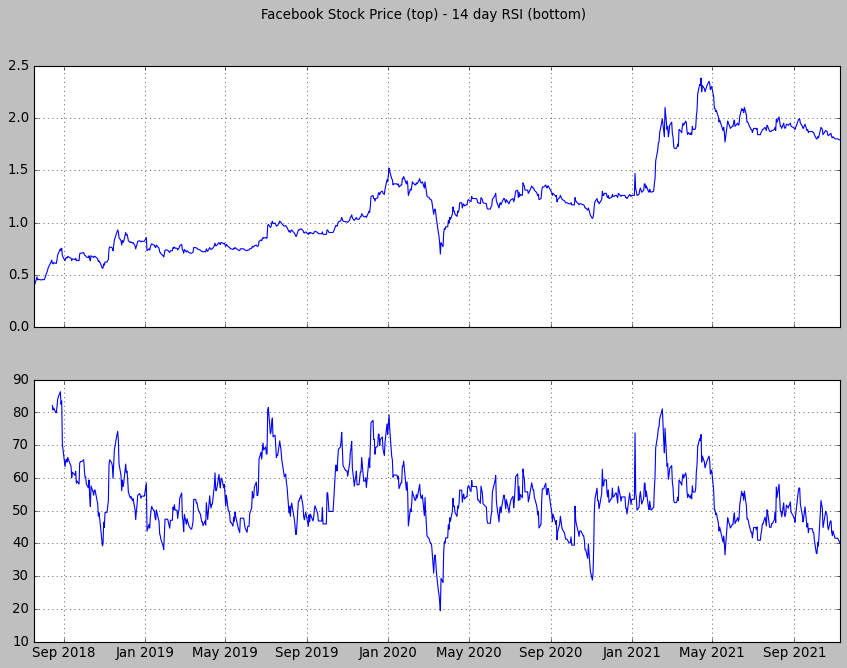

In [152]:
## Chart the stock price and RSI
#plt.style.use('_classic_test')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Facebook Stock Price (top) - 14 day RSI (bottom)', )
axs[0].plot(df['Adj Close'])
axs[1].plot(df['RSI'])
axs[0].grid()
axs[1].grid()

# GENERATE BUY & SELL SIGNALS:

In [153]:
## Calculate the buy & sell signals
## Initialize the columns that we need
df['Long Tomorrow'] = np.nan
df['Buy Signal'] = np.nan
df['Sell Signal'] = np.nan
df['Buy RSI'] = np.nan
df['Sell RSI'] = np.nan
df['Strategy'] = np.nan
## Calculate the buy & sell signals
for x in range(15, len(df)):
    
    # Calculate "Long Tomorrow" column
    if ((df['RSI'][x] <= 40) & (df['RSI'][x-1]>40) ):
        df['Long Tomorrow'][x] = True
    elif ((df['Long Tomorrow'][x-1] == True) & (df['RSI'][x] <= 70)):
        df['Long Tomorrow'][x] = True
    else:
        df['Long Tomorrow'][x] = False
        
    # Calculate "Buy Signal" column
    if ((df['Long Tomorrow'][x] == True) & (df['Long Tomorrow'][x-1] == False)):
        df['Buy Signal'][x] = df['Adj Close'][x]
        df['Buy RSI'][x] = df['RSI'][x]
        
    # Calculate "Sell Signal" column
    if ((df['Long Tomorrow'][x] == False) & (df['Long Tomorrow'][x-1] == True)):
        df['Sell Signal'][x] = df['Adj Close'][x]
        df['Sell RSI'][x] = df['RSI'][x]
        
## Calculate strategy performance
df['Strategy'][15] = df['Adj Close'][15]
for x in range(16, len(df)):
    if df['Long Tomorrow'][x-1] == True:
        df['Strategy'][x] = df['Strategy'][x-1]* (df['Adj Close'][x] / df['Adj Close'][x-1])
    else:
        df['Strategy'][x] = df['Strategy'][x-1]

<ipython-input-153-5bd053afbd08>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long Tomorrow'][x] = False
<ipython-input-153-5bd053afbd08>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Long Tomorrow'][x] = True
<ipython-input-153-5bd053afbd08>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy Signal'][x] = df['Adj Close'][x]
<ipython-input-153-5bd053afbd08>:23: SettingWithCopyWarning: 
A value is trying to be se

# Exit / Entry:

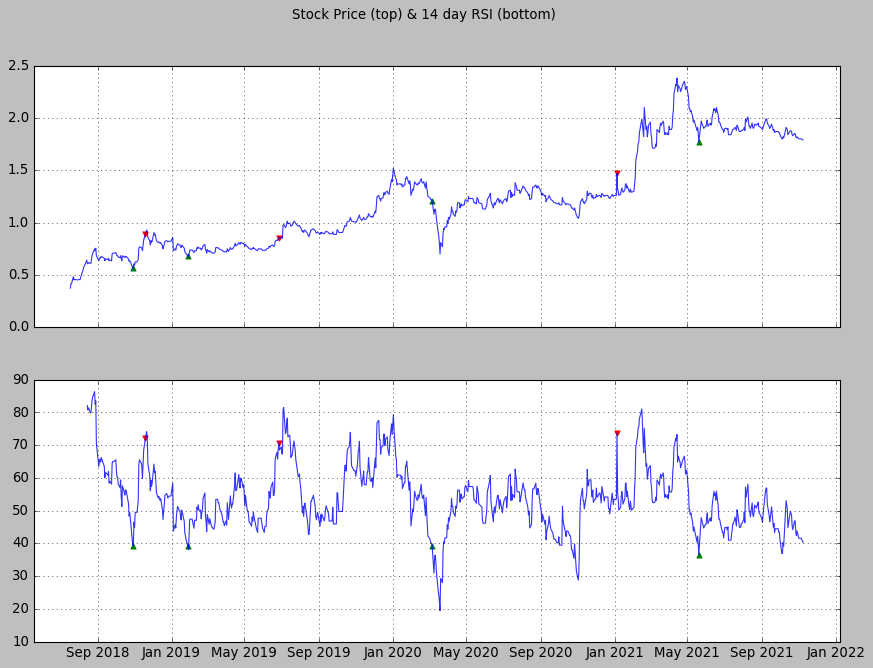

In [154]:
## Chart the buy/sell signals:
#plt.style.use('_classic_test')
fig, axs = plt.subplots(2, sharex=True, figsize=(13,9))
fig.suptitle('Stock Price (top) & 14 day RSI (bottom)')
## Chart the stock close price & buy/sell signals:
axs[0].scatter(df.index, df['Buy Signal'],  color = 'green',  marker = '^', alpha = 1)
axs[0].scatter(df.index, df['Sell Signal'],  color = 'red',  marker = 'v', alpha = 1)
axs[0].plot(df['Adj Close'], alpha = 0.8)
axs[0].grid()
## Chart RSI & buy/sell signals:
axs[1].scatter(df.index, df['Buy RSI'],  color = 'green', marker = '^', alpha = 1)
axs[1].scatter(df.index, df['Sell RSI'],  color = 'red', marker = 'v', alpha = 1)
axs[1].plot(df['RSI'], alpha = 0.8)
axs[1].grid()

# Moving Average Convergence Divergence (MACD):

In [155]:
## Calculate the MACD and Signal Line indicators
## Calculate the Short Term Exponential Moving Average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() 
## Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust=False).mean() 
## Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
## Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

## Plot MACD & Signal Line:

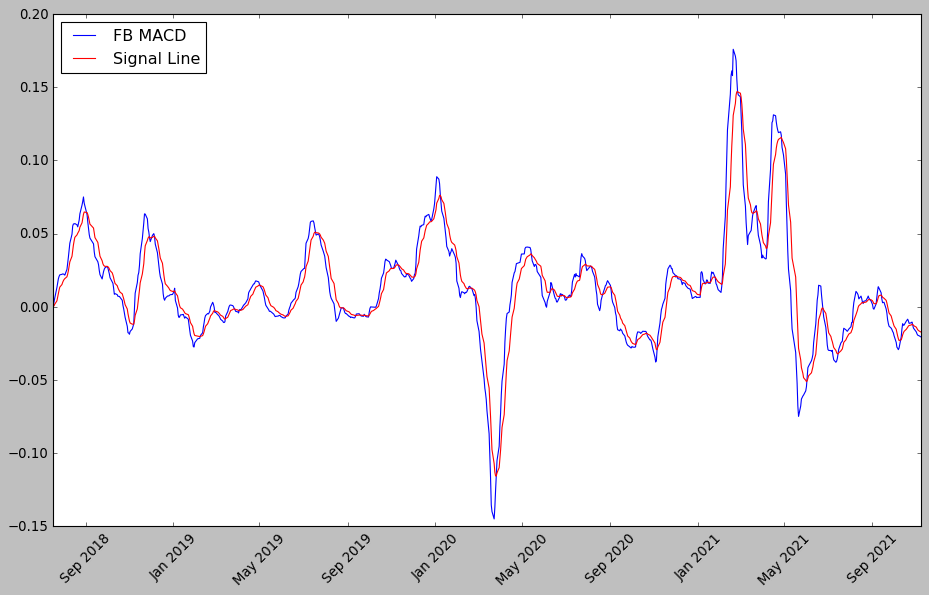

In [156]:
## Plot the Chart
plt.figure(figsize=(14,8))
plt.style.use('classic')
plt.plot(df.index, MACD, label='FB MACD', color = 'blue')
plt.plot(df.index, signal, label='Signal Line', color='red')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

# Trading Facebook 3-Year Metrics:

In [157]:
## Performance statistics
## Number of trades
trade_count = df['Buy Signal'].count()
## Average Profit per/trade:
average_profit = ((df['Strategy'][-1] / df['Strategy'][15])**(1/trade_count))-1
## Number of days per/trade
total_days = df['Long Tomorrow'].count()
average_days = int(total_days / trade_count)
print('Strategy yielded ', trade_count, ' trades')
print('Average trade lasted ', average_days, ' days per trade')
print('Our average profit per trade was ', average_profit*100, '%')

Strategy yielded  4  trades
Average trade lasted  199  days per trade
Our average profit per trade was  25.018831248732166 %
